# <span style="color:black"> Numerical Simulation Laboratory (NSL) </span>

## Francesco Gnan - <span style="color:grey">  Numerical Exercises 1</span>

## <span style="color:red"> Introduction </span>

In this laboratory we want to verify the performance of the pesudo-random number **linear congruential generator** (LCG) contained in files <font face = "Courier"> `random.h` </font> and <font face = "Courier"> `random.cpp` </font>.
- In *Exercise 01.1* we will evaluate the expectation value and the second central moment (i.e. the variance) of random variables extracted from uniform distributions. 
- In *Esxercise 01.2* we want to check the validity of the **central limit theorem** (CLT).
- Finally, in *Exercise 01.3* we will run a simulation of **Buffon's experiment** for estimating $\pi$.

We will calculate the statistical uncertainties with the **blocking method**:

to estimate the standard deviation of the mean of a result $<A>$, we first need the variance $\sigma_A^2$.
We divide our $M$ Monte Carlo steps in $N$ blocks ($N$ < $M$).
In each block we use $L = M / N$ Monte Carlo steps to esimate $A_i$ and $A_i^2$, where $i = 1,...,N$.                           
Since

$$\sigma^2_A = \langle A^2 \rangle -\langle A\rangle^2$$ 

the standard deviation of the mean is         

$$\hat{\sigma}_A = \frac{\sigma_A}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]}$$

In this way, we can give a progressive estimation of the average value of $A$ and its uncertainty from block to block.           In practice we pass a <font face = "Courier"> `std::vector` </font> filled with our observables to the <font face = "Courier"> `blocks` </font>  method contained in the file <font face = "Courier"> `Blocks.h`</font>, which prints results to file.                                                             


Thus, we divide our data into sufficiently large blocks, so that the mean value in each block is uncorrelated with the mean values in the other blocks.
These uncorrelated mean values can be used as experimental data with which to calculate statistical uncertainty due to the CLT.

Below there is a list of the packages that will be used during this notebook:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
import math
import seaborn as sns
import scipy.stats as sc

## <span style="color:red"> Exercise 01.1 </span>

1. We want to evaluate the mean value:
    $$<r> = \int_{d\Omega} r\,d\mu = \int_0^1 r(x)p(x)\,dx = \int_0^1 r\,dr = \frac{1}{2}$$
    
    we pass a <font face = "Courier"> `std::vector` </font>, filled with $M = 10^4$ pseudo-random numbers $r_i$ generated uniformly in the interval $[0,1]$ with the method <font face = "Courier"> `Rannyu()` </font> of the class <font face = "Courier"> `random.h` </font>, to the <font face = "Courier"> `blocks` </font> method of the class <font face = "Courier"> `Blocks.h` </font>.
    We use $N = 100$ blocks and we make a picture of the estimation of $<r>$ as a function of the number of blocks.

2. we operate in the same way passing a <font face = "Courier"> `std::vector` </font> filled with $M$ values of 
   $\left(r_i - <r>\right)^2$, to calculate:
   $$\sigma^2 = \int_0^1 \left(r - 1/2 \right)^2 \,dr = \frac{1}{12}$$

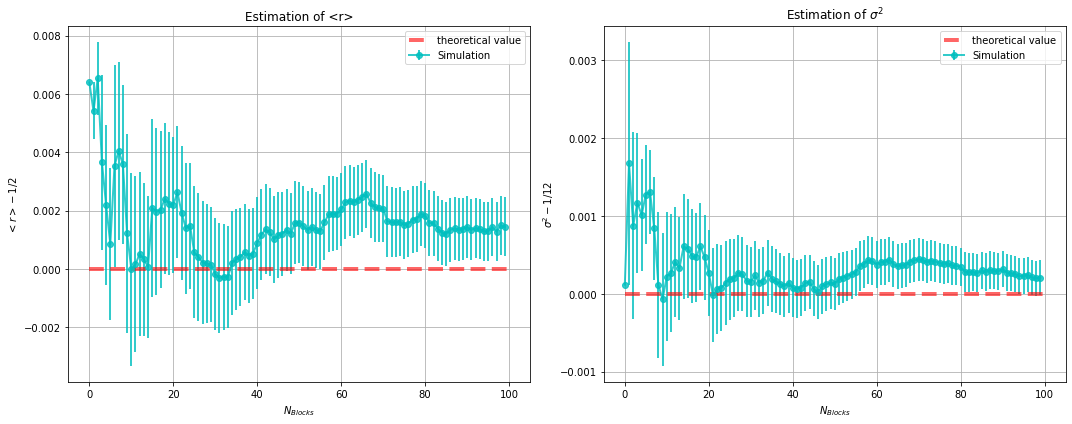

Stima finale:  <r> = 0.501438 +- 0.00101189
Stima finale:  𝜎2 = 0.0835406 +- 0.000222892


In [18]:
x1, sum_prog1, err_prog1 = np.loadtxt("./Risultati/es01.1a.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
x2, sum_prog2, err_prog2 = np.loadtxt("./Risultati/es01.1b.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title(r"Estimation of <r>")
plt.errorbar(x1,sum_prog1-0.5,yerr=err_prog1, color='c', marker='o', alpha=0.8,linewidth=2, label='Simulation')
plt.xlabel('$N_{Blocks}$')
plt.ylabel('$<r> - 1/2$')
plt.hlines(0,0,100, color='red', linestyle='--', label="theoretical value", linewidth=4, alpha=0.6)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title(r"Estimation of $\sigma^2$")
plt.errorbar(x2,sum_prog2-1/12,yerr=err_prog2,color='c', marker='o', alpha=0.8, linewidth=2, label='Simulation')
plt.xlabel('$N_{Blocks}$')
plt.ylabel('$\sigma^2 - 1/12$')
plt.hlines(0,0,100, color='red', linestyle='--', label="theoretical value", linewidth=4, alpha=0.6)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print('Stima finale:  <r> = ' + str(sum_prog1[-1]) + ' +- ' + str(err_prog1[-1]))
print('Stima finale:  𝜎2 = ' + str(sum_prog2[-1]) + ' +- ' + str(err_prog2[-1]))


Under the assumption that data are distributed on a Gaussian, it is possible to make a quantitative comparison between the simulated value at the hundredth block and the expected value.
The quantity
$$z = \frac{|x_{best} - x_{teo}|}{\hat{\sigma}}$$
indicates how far $x_{best}$ is from $x_{teo}$ in units of standard deviation. $\hat{\sigma}$ is the standard deviation of the mean.

1) $z = \frac{|0.501438 \, - \, 0.5|}{0.00101189} \approx 1.42$

Since $z = 1.42$, there is a $16\%$ probability that the difference between $<r>$ and $0.5$ is statistical in origin, or that $0.5$ is the mean value of the measured statistical distribution. We can conclude that the simulated measure is compatible with the expected value with a probability of $16\%$.
   
2) $z = \frac{|0.0835406 \, - \, 1/12|}{0.000222892} \approx 0.93$

In this case, there is a $35\%$ probability that the difference between $\sigma^2$ and $\frac{1}{12}$ is statistical. For this reason, we affirm that the two values are compatible according to the above probability. 


-------------------------------------------------------------------------------
3. In this subsection we perform a hypothesis test: we want to show that we can treat the numbers $r_i$ as if they were extracted from a uniform distribution, even if they are generated in a deterministic way by the LCG.
We implement a $\chi^2$ test to reject the hypothesis that $r_i$ are **not** drawn from a uniform distribution.


We divide the interval $[0,1]$ into $M = 100$ sub-intervals. For each sub-interval we execute $N = 10^4$ throws of pseudo-random numbers $x_i$ generated with the method <font face = "Courier"> `Rannyu()` </font>.

After having defined a <font face = "Courier"> `std::vector` </font> of dimension $M$ in each sub-interval, for each throw we increase by one the n-th box of the vector, where
$$n = \left\lfloor x_i \cdot M \right\rfloor$$

Then in each sub-interval we can compute:
$$\chi_j^2 = \sum_{i=1}^M \frac{\left( N_i - N/M \right)^2}{N/M}$$

Where $j = 1,...,100$ and $N_i$ is the number of pesudo-random values extracted in each of the $M$ sub-intervals.

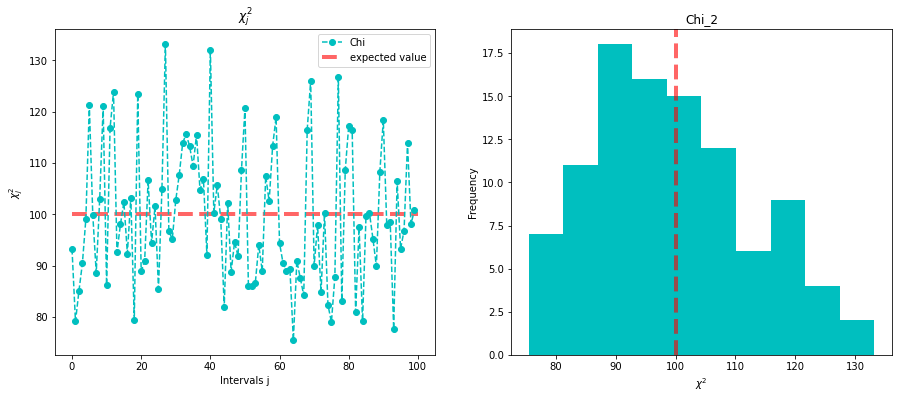

In [17]:
x, chi = np.loadtxt("./Risultati/es01.1c.dat", usecols=(0,1), delimiter=' ', unpack='true')


plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title(r"$\chi_j^2$")
plt.plot(x,chi,'--',color='c', marker='o', label='Chi')
plt.xlabel('Intervals j')
plt.ylabel('$\chi_j^2$')
plt.hlines(100,0,100, color='red', linestyle='--', label="expected value", linewidth=4, alpha=0.6)

plt.legend()

plt.subplot(1,2,2)
plt.title(r"$\chi^2$ distribution")
n_bins = 100
n, bins, patches=plt.hist(chi, color='c')
plt.xlabel("$\chi^2$")
plt.ylabel("Frequency")
plt.title("Chi_2")
plt.axvline(100,0,17.5, color='red', linestyle='--', label="expected value", linewidth=4, alpha=0.6)


plt.show()

As we expected, $\chi^2 \simeq 100$ and we can reject the hypothesis. So, for our purposes, we can treat data $r_i$ as if they were generated by a uniform distribution.
Anyway we notice that the histogram is not perfectly centered around the expected value 100.

## <span style="color:red"> Exercise 01.2 </span>

In this exercise we want to check the **Central Limit Theorem** (CLT), using the LCG, previously tested.
The CLT states that, if we consider $N$ statistically, independent and identically, distributed random variables $x_1,...,x_N$, each with mean $\mu$ and finite, variance (i.e. $\sigma_{x_i}^2 < \infty$), the probability, distribution, function (pdf) of the variable
$$A_N = \frac{1}{N}\sum_{i=1}^N \,x_i$$
is a Gaussian if $N \rightarrow \infty$, provided 
the first and second moments of $x_n$ do not diverge.


So, whatever the exact underlying distribution of the individual random variables $x_i$ is, as long as the first two moments exist, the average variable $A_N$ is asintotically Gaussian distributed. In other words, the Gaussian pdf is an **attractor** in the functional space of pdfs for all the pdfs that fulfill the requirements of the CLT.

Since other attractors also exist, we can generalize the theorem. In fact, thanks to the Levy and Khintchine's theorem, a probability density can only be a limiting distribution of the sum of independent and randomly distributed random variables if it is **stable**.

For this reason, for example, the Cauchy distribution is an attractor even if its **second moment is infinite**.

Below we can see the behavior of $N$ random variables $x_i$ sampled from a Uniform (1), an Exponential (2) and a Lorentzian (3) distribution.
We perform $10^4$ relizations of $A_N$, where $N = 1, 2, 10, 100$, for each distribution.

In [158]:
Uni_1, Exp_1, Lor_1 = np.loadtxt("Risultati/es01.2a.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
Uni_2, Exp_2, Lor_2 = np.loadtxt("Risultati/es01.2b.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
Uni_3, Exp_3, Lor_3 = np.loadtxt("Risultati/es01.2c.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
Uni_4, Exp_4, Lor_4 = np.loadtxt("Risultati/es01.2d.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

x1 = Uni_1.tolist()
y1 = Exp_1.tolist()
z1 = Lor_1.tolist()
x2 = Uni_2.tolist()
y2 = Exp_2.tolist()
z2 = Lor_2.tolist()
x3 = Uni_3.tolist()
y3 = Exp_3.tolist()
z3 = Lor_3.tolist()
x4 = Uni_4.tolist()
y4 = Exp_4.tolist()
z4 = Lor_4.tolist()

vec1 = np.array([x1,x2,x3,x4])
vec2 = np.array([y1,y2,y3,y4])
vec3 = np.array([z1,z2,z3,z4])
title = np.array([1,2,10,100])
n_bins=30

In [142]:
from scipy.optimize import curve_fit

def gauss(x,a,b,c):
    return a * np.exp(-b*(x-c)**2)

def lorentz(x,a,b):
    return 1/np.pi*b/((x-a)**2+b**2)

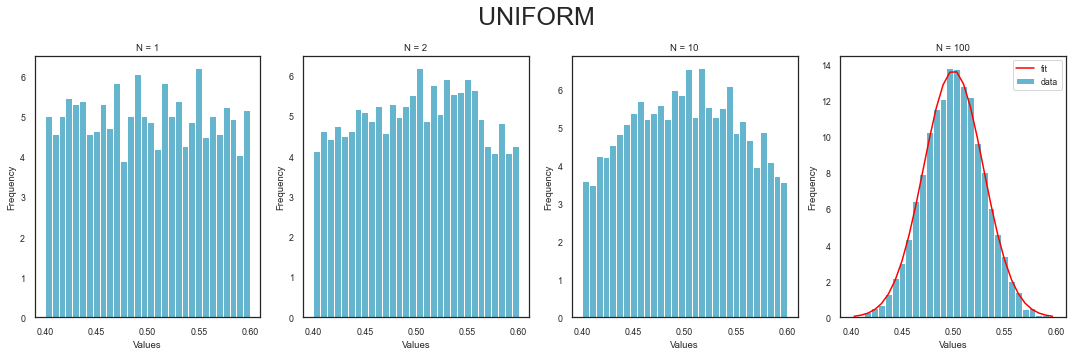

In [153]:
sns.set_theme(font_scale=0.8, style='white') 

plt.figure(figsize=(15,5))
plt.suptitle('UNIFORM',fontsize=25)

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.title('N = ' +str(title[i]))
    n, bins, patches=plt.hist(vec1[i], bins=n_bins, density=True, label='data', range=(0.4,0.6),  color='c')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    if i == 3:
        bin_size = abs(bins[1]-bins[0])
        x = np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,num=n_bins,endpoint=True)
        p_opt, p_cov = curve_fit(gauss, x, n)
        y_fit = gauss(x,p_opt[0],p_opt[1],p_opt[2])
        plt.plot(x,y_fit,color='red',label='fit')
        
plt.legend()
plt.tight_layout()
plt.show()

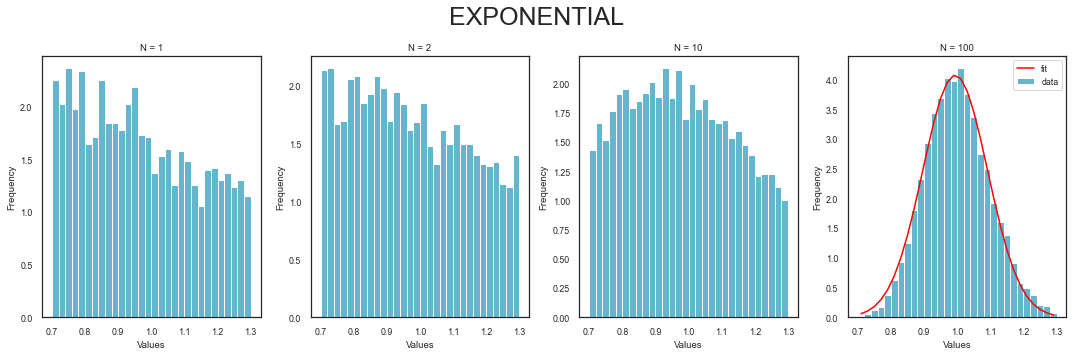

In [154]:
sns.set_theme(font_scale=0.8, style='white') 

plt.figure(figsize=(15,5))
plt.suptitle('EXPONENTIAL',fontsize=25)

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.title('N = ' +str(title[i]))
    n, bins, patches = plt.hist(vec2[i], bins=n_bins, density=True, label='data', range=(0.7,1.3),  color='c')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    if i == 3:
        bin_size = abs(bins[1]-bins[0])
        x = np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,num=n_bins,endpoint=True)
        p_opt, p_cov = curve_fit(gauss, x, n)
        y_fit = gauss(x,p_opt[0],p_opt[1],p_opt[2])
        plt.plot(x,y_fit,color='red',label='fit')

plt.legend()
plt.tight_layout()
plt.show()

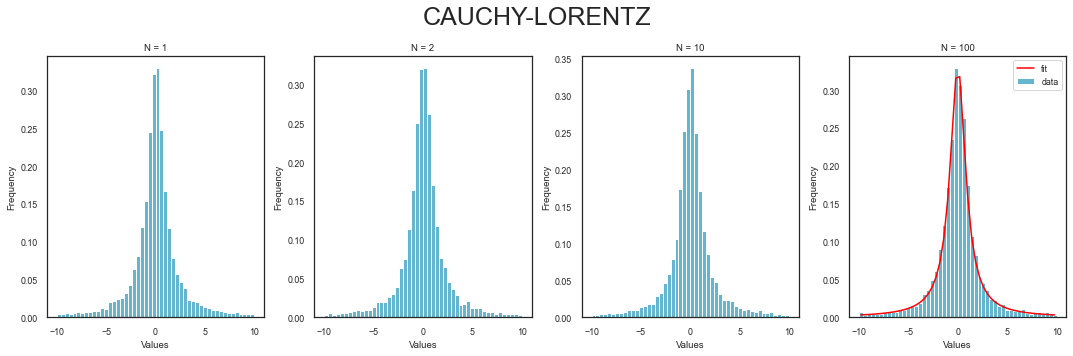

In [162]:
sns.set_theme(font_scale=0.8, style='white') 

plt.figure(figsize=(15,5))
plt.suptitle('CAUCHY-LORENTZ',fontsize=25)

n_bins = 50
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.title('N = ' +str(title[i]))
    n, bins, patches = plt.hist(vec3[i], bins=n_bins, density=True, label='data', range=(-10,10),  color='c')    
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    if i == 3:
        bin_size = abs(bins[1]-bins[0])
        x = np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,num=n_bins,endpoint=True)
        p_opt, p_cov = curve_fit(lorentz, x, n)
        y_fit = lorentz(x,p_opt[0],p_opt[1])
        plt.plot(x,y_fit,color='red',label='fit')

plt.legend()
plt.tight_layout()
plt.show()

## Exercise 01.3

In this section we want to estimate the value of $\pi$, simulating the Buffon's experiment.
We imagine throwing a needle of legnght $L$ on a plane covered with equispaced lines. These lines are separated by a distance $d < L$. We evaluate $\pi$ as

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$


where $P$ is the probability that the needle intersect one of the lines.
We exploit the <font face = "Courier"> `EsperimentoBuffon` </font>class contained in the file <font face = "Courier"> `Buffon.h` </font>.
To extract a uniform $\theta$ angle between $0$ and $\pi$ we use the method <font face = "Courier"> `Estrai_Theta` </font>.

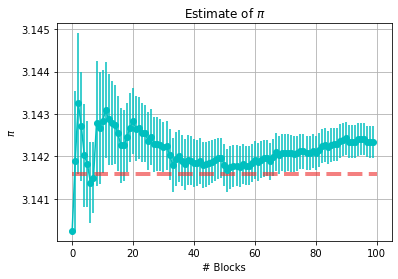

Final estimation:  pi = 3.14234 +- 0.000367937


In [9]:
y, Pi_prog, error_prog = np.loadtxt("./Risultati/es01.3.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.errorbar(y,Pi_prog,yerr=error_prog,color='c',marker='o')
plt.xlabel('# Blocks')
plt.ylabel('$\pi$')
plt.title('Estimate of $\pi$')
plt.hlines(np.pi,0,100, color='#EE2C2C', linestyle='--', label="Valore teorico", linewidth=4, alpha=0.6)
plt.grid(True)
plt.show()

print('Final estimation:  pi = ' + str(Pi_prog[-1]) + ' +- ' + str(error_prog[-1]))
